In [1]:
%load_ext autoreload
%autoreload 2

# Load libraries and sample data

In [12]:
import pandas as pd
import numpy as np
from utils.backtester import BackTester
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


ticker_list = ["SPY", "GLD", "TLT", "DBA", "DBB", "USO"]
price_data = {}
for ticker in ticker_list:
    # Load sample data
    df = pd.read_pickle(f'data/raw/price/{ticker}_20250201.pkl')
    df.set_index('Date', inplace=True)
    # data.index = pd.to_datetime(data.index, format="mixed")
    price_data[ticker] = df

# Trend following strategy

Static Allocation Results: {'cagr': 0.08038410442909583, 'volatility': 0.10805541480905285, 'sharpe': 0.7439155600961264, 'max_drawdown': 0.3073947984905089, 'cumulative_returns': 3.0365125424284365}


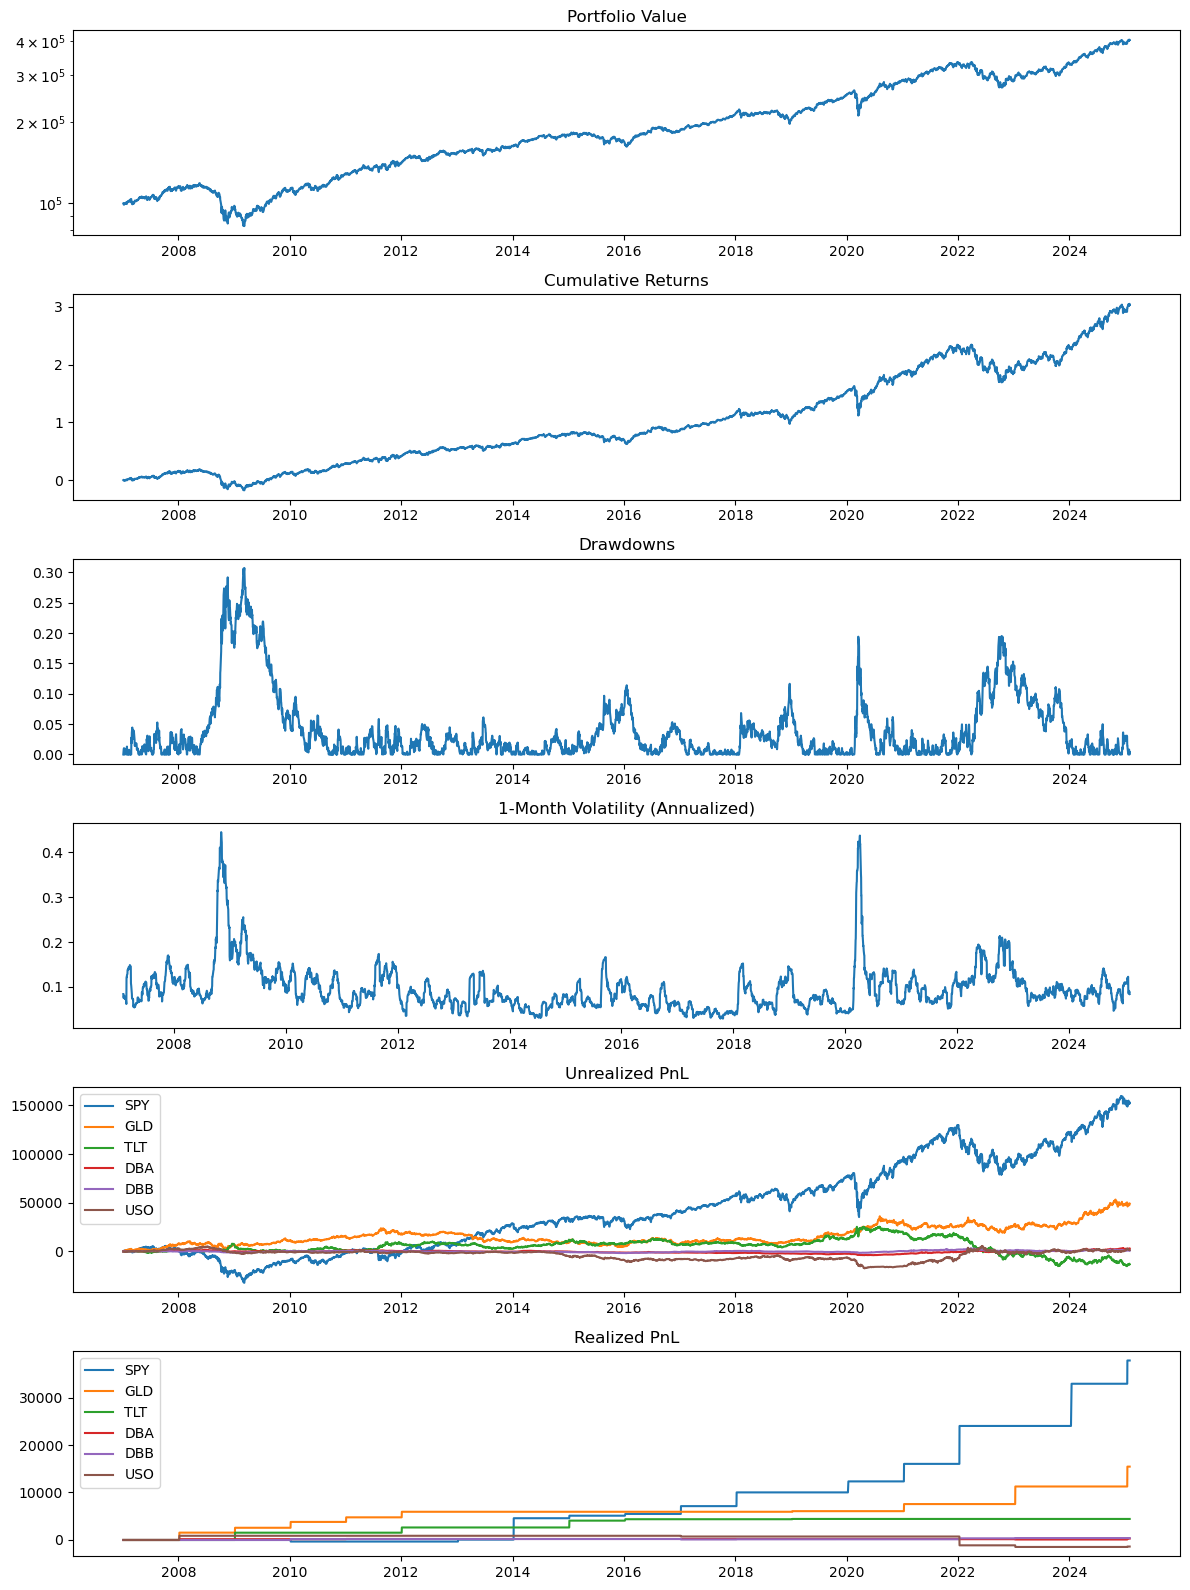

In [11]:
from strategies.static_allocation import StaticAllocationStrategy

# Initialize backtester
bt = BackTester(price_data)
bt.add_strategy(
    StaticAllocationStrategy, 
    tickers=['SPY', 'TLT', 'DBA', 'USO', 'GLD', 'DBB'], 
    price_data=price_data, 
    weights={
        'SPY': 0.5,
        'TLT': 0.2,
        'DBA': 0.03,
        'USO': 0.05,
        'GLD': 0.2,
        'DBB': 0.02,
    },
    rebalance_period=252)
results = bt.backtest()
print("Static Allocation Results:", {k: v for k, v in results.items() if k != 'returns'})
bt.plot_results()